### Instructor Demo: Beta

This program reads in the daily closing prices of Amazon and the S&P 500 as CSVs and calculates the beta value of Amazon to represent the volatility of Amazon returns relative to the volatility of S&P 500 returns.

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

### Read CSVs in as DataFrames

In [2]:
# Read the daily closing prices of AMZN, set the `date` as a datetime index
amzn_data=Path("/Users/ddevii/Rutgers/Rutgers_Personal_Repo/01-Lesson-Plans/04-Pandas/1/Activities/05-Ins_Beta/Resources/amzn_data.csv")
amzn_df=pd.read_csv(amzn_data, index_col="date", infer_datetime_format=True, parse_dates=True)
amzn_df

# Read the daily closing prices of S&P 500, set the `date` as a datetime index
sp500_data=Path("/Users/ddevii/Rutgers/Rutgers_Personal_Repo/01-Lesson-Plans/04-Pandas/1/Activities/05-Ins_Beta/Resources/sp500_data.csv")
sp500_df=pd.read_csv(sp500_data, index_col="date", infer_datetime_format=True, parse_dates=True)
sp500_df

,close
date,
2014-05-20,1872.829956
2014-05-21,1888.030029
2014-05-22,1892.489990
2014-05-23,1900.530029
2014-05-27,1911.910034
...,...
2019-05-13,2811.870117
2019-05-14,2834.409912
2019-05-15,2850.959961


### Combine DataFrames, Sort Index, and Rename Columns

In [3]:
# Create a new pivot table where the columns are the closing prices for each ticker
amzn_vs_sp500 = pd.concat([amzn_df, sp500_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
amzn_vs_sp500.sort_index(inplace=True)

# Set column names to 'AMZN' and 'S&P 500'
amzn_vs_sp500.columns = ["AMZN", "S&P 500"]

# Display a few rows
amzn_vs_sp500.head(5)

,AMZN,S&P 500
date,,
2014-05-20,301.19,1872.829956
2014-05-21,305.01,1888.030029
2014-05-22,304.91,1892.489990
2014-05-23,312.24,1900.530029
2014-05-27,310.82,1911.910034


### Calculate Daily Returns

In [5]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_return = amzn_vs_sp500.pct_change()
daily_return.head()

,AMZN,S&P 500
date,,
2014-05-20,NaN,NaN
2014-05-21,0.012683,0.008116
2014-05-22,-0.000328,0.002362
2014-05-23,0.024040,0.004248
2014-05-27,-0.004548,0.005988


### Calculate Covariance of AMZN returns vs. S&P 500 returns

In [11]:
# Calculate covariance of all daily returns of AMZN vs. S&P 500
covariance = daily_return["AMZN"].cov(daily_return["S&P 500"])
covariance

9.344294535060873e-05

### Calculate Variance of S&P 500 returns

In [12]:
# Calculate variance of all daily returns of AMZN vs. S&P 500
variance = daily_return["S&P 500"].var()
variance

7.030950113534627e-05

### Calculate Beta of AMZN

In [13]:
# Calculate beta of all daily returns of AMZN
Beta = covariance/variance
Beta


1.3290230173974698

### Calculate 30-Day Rolling Covariance of AMZN Returns vs. S&P 500 Returns

<AxesSubplot:title={'center':'Rolling 30-Day Covariance of AMZN Returns vs. S&P 500 Returns'}, xlabel='date'>

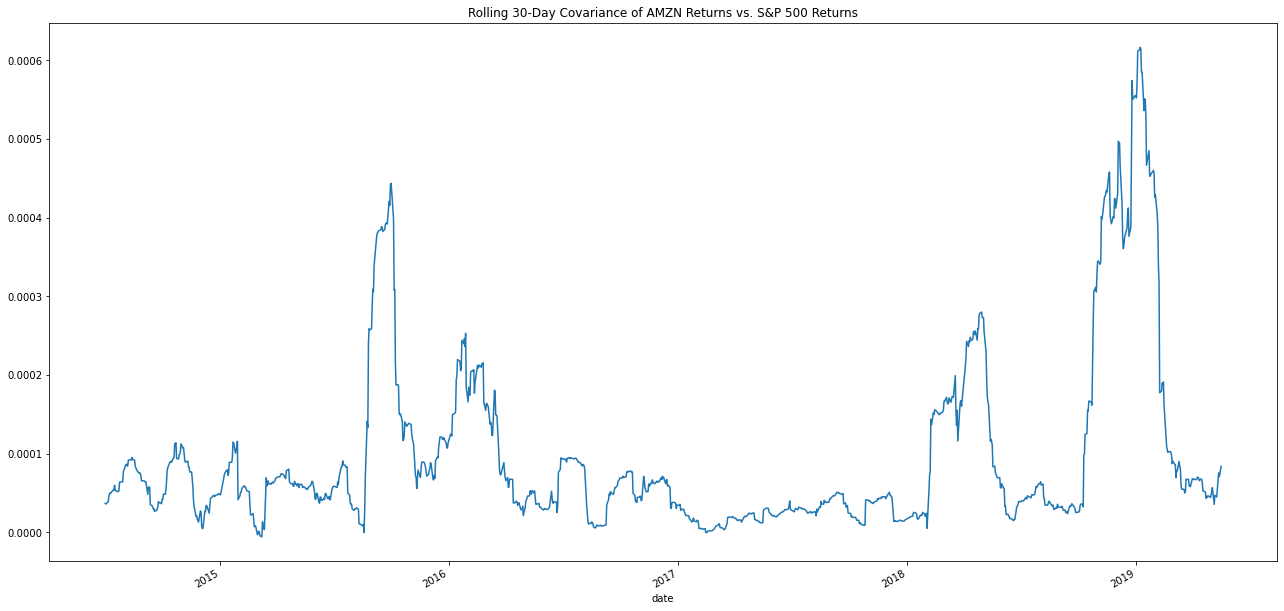

In [18]:
# Calculate 30-day rolling covariance of AMZN vs. S&P 500 and plot the data
rolling_covariance = daily_return["AMZN"].rolling(window=30).cov(daily_return["S&P 500"])
rolling_covariance.plot(figsize=(22, 11), title="Rolling 30-Day Covariance of AMZN Returns vs. S&P 500 Returns")

### Calculate 30-Day Rolling Variance of S&P 500 Returns

<AxesSubplot:title={'center':'Tqifsharrobt mu ne sp500'}, xlabel='date'>

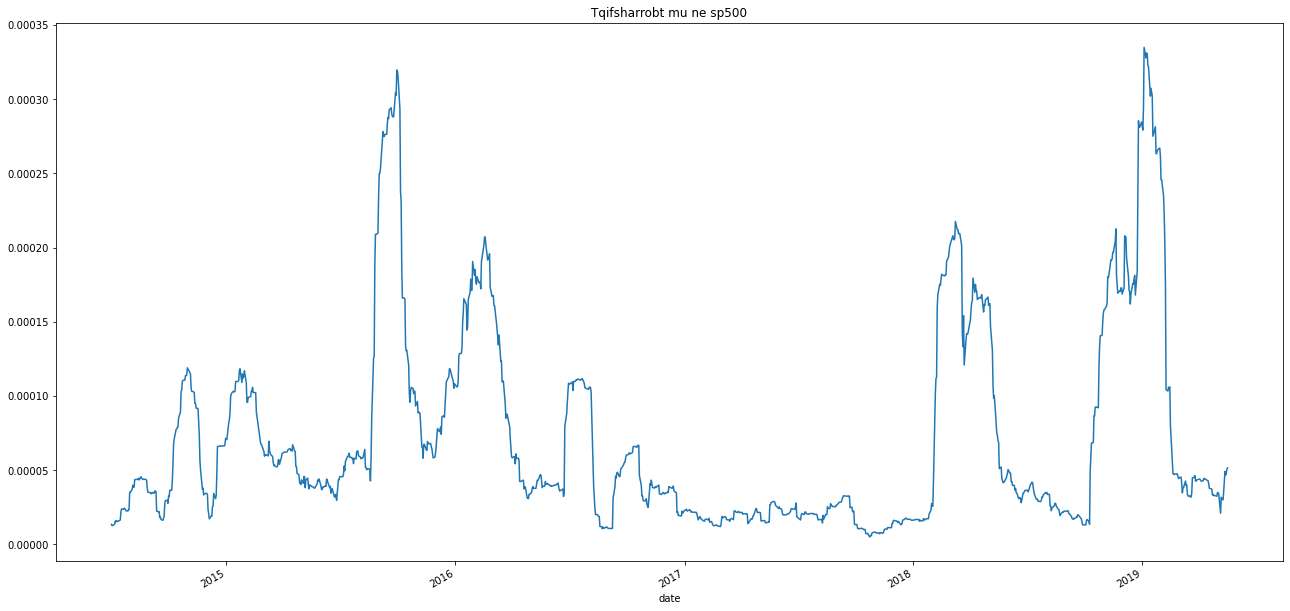

In [23]:
# Calculate 30-day rolling variance of AMZN vs. S&P 500 and plot the data
rolling_variance = daily_return["S&P 500"].rolling(window=30).var()
rolling_variance.plot(figsize=(22,11), title= "Rolling 30-Day Variance of S&P 500 Returns")

### Calculate 30-Day Rolling Beta of AMZN

<AxesSubplot:title={'center':'Rolling 30-Day Beta of AMZN'}, xlabel='date'>

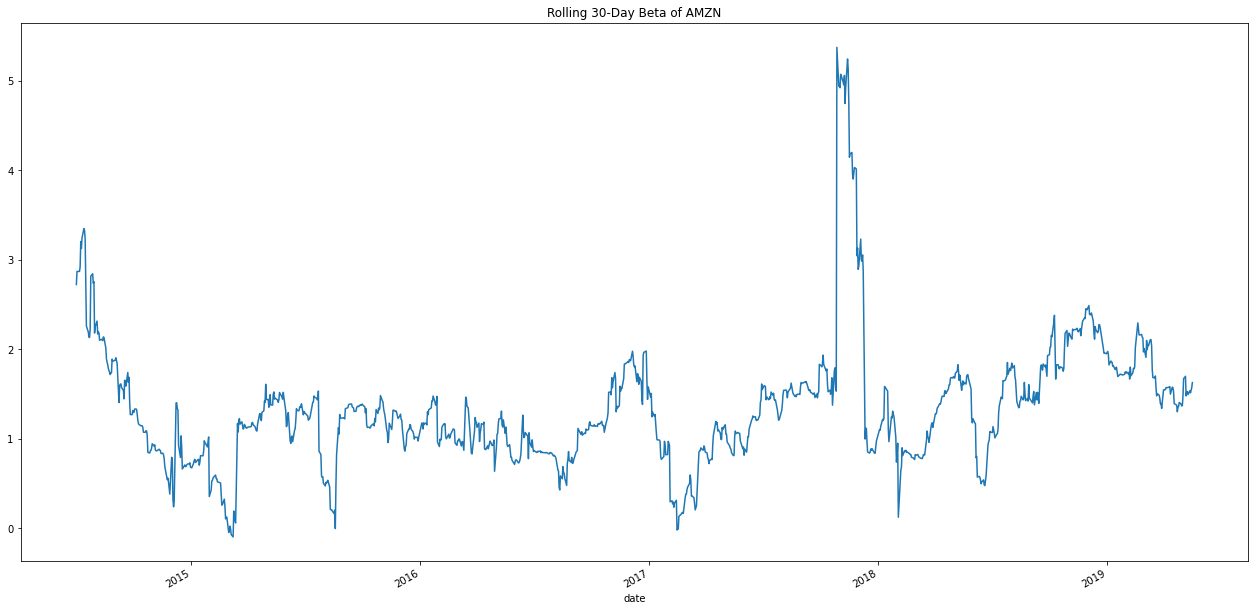

In [24]:
# Calculate 30-day rolling beta of AMZN and plot the data
thirty_day_beta = rolling_covariance / rolling_variance
thirty_day_beta.plot(figsize=(22,11), title= "Rolling 30-Day Beta of AMZN")

### Beta vs. Correlation

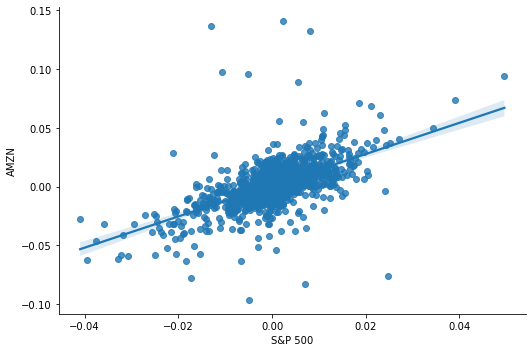

In [25]:
# Showcase beta vs. correlation by plotting a scatterplot using the Seaborn library and fitting a regression line
sns.lmplot(x="S&P 500", y="AMZN", data=daily_return, aspect=1.5, fit_reg=True)

Note that the Beta value and the correlation do **not** match! Beta is a measure of volatity relative to the market. We would conclude that this stock is approximately 33% more volatile than the market (Beta of 1.329). The Pearson Correlation (which is R, not R-squared) is an indication of the extent of the linear relationship between AMZN and the S&P500. 